<a href="https://colab.research.google.com/github/jepowo/CPE_313/blob/main/CPE313_HOA2p1_ConvolutionalNeuralNetwork_cpe32s8_DelaRosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

### Procedures
Load the necessary libraries

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline



---


* Shuffle the data
* Split the data into train and test sets

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples




---


Check the image size

In [5]:
x_train[444].shape

(32, 32, 3)



---


Visualize one of the images

[9]


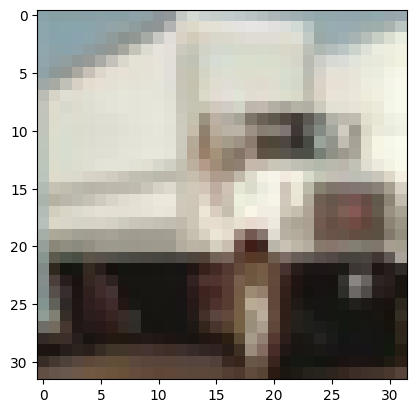

In [ ]:
print(y_train[444])
plt.imshow(x_train[444]);

In [6]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



---


Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [7]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)



---


Convert to float and scale the datasets

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



---


Build a CNN using Keras Sequential

In [ ]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        



---


* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 34s 21ms/step - loss: 1.7155 - accuracy: 0.3748 - val_loss: 1.4481 - val_accuracy: 0.4887
Epoch 2/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4326 - accuracy: 0.4851 - val_loss: 1.2402 - val_accuracy: 0.5588
Epoch 3/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3433 - accuracy: 0.5236 - val_loss: 1.6268 - val_accuracy: 0.4406
Epoch 4/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2982 - accuracy: 0.5428 - val_loss: 1.1900 - val_accuracy: 0.5870
Epoch 5/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2683 - accuracy: 0.5572 - val_loss: 1.1718 - val_accuracy: 0.5960
Epoch 6/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2590 - accuracy: 0.5633 - val_loss: 1.1697 - val_accuracy: 0.5945
Epoch 7/15
1563/1563 [==============================] - 32s 21ms/step - loss: 1.2512 - accuracy: 0.5703 - val_loss: 1.3039 -

In [ ]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 1.2211015224456787
Test accuracy: 0.5922999978065491


### Supplementary Activity


* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=x_train.shape[1:]))
model_2.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu'))
model_2.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))



---


* Write the number of parameters of your model and compare it to the previous model

In [ ]:
model_1.count_params()

181162

In [ ]:
model_2.count_params()

150506



---


* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

In [ ]:
batch_size = 32
opt = keras.optimizers.RMSprop(lr=0.0005)

model_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_2.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 226s 144ms/step - loss: 1.6895 - accuracy: 0.3831 - val_loss: 1.7064 - val_accuracy: 0.4219
Epoch 2/5
1563/1563 [==============================] - 220s 141ms/step - loss: 1.3288 - accuracy: 0.5306 - val_loss: 1.2521 - val_accuracy: 0.5576
Epoch 3/5
1563/1563 [==============================] - 219s 140ms/step - loss: 1.2108 - accuracy: 0.5795 - val_loss: 1.2010 - val_accuracy: 0.5752
Epoch 4/5
1563/1563 [==============================] - 219s 140ms/step - loss: 1.1454 - accuracy: 0.6073 - val_loss: 1.1587 - val_accuracy: 0.6057
Epoch 5/5
1563/1563 [==============================] - 219s 140ms/step - loss: 1.1156 - accuracy: 0.6199 - val_loss: 1.1784 - val_accuracy: 0.6029


In [ ]:
score_2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 220s 141ms/step - loss: 1.1218 - accuracy: 0.6233 - val_loss: 1.1503 - val_accuracy: 0.6163
Epoch 2/5
1563/1563 [==============================] - 224s 143ms/step - loss: 1.1160 - accuracy: 0.6280 - val_loss: 1.2036 - val_accuracy: 0.6057
Epoch 3/5
1563/1563 [==============================] - 217s 139ms/step - loss: 1.1186 - accuracy: 0.6287 - val_loss: 1.2593 - val_accuracy: 0.5851
Epoch 4/5
1563/1563 [==============================] - 216s 138ms/step - loss: 1.1385 - accuracy: 0.6256 - val_loss: 1.2322 - val_accuracy: 0.6127
Epoch 5/5
1563/1563 [==============================] - 214s 137ms/step - loss: 1.1556 - accuracy: 0.6188 - val_loss: 1.2400 - val_accuracy: 0.6088


In [ ]:
print("Train Loss:", score_2.history['loss'])
print("Train Accuracy:", score_2.history['accuracy'])
print("Validation Loss:", score_2.history['val_loss'])
print("Validation Accuracy:", score_2.history['val_accuracy'])

Train Loss: [1.121795415878296, 1.1159931421279907, 1.1185857057571411, 1.1384644508361816, 1.1556131839752197]
Train Accuracy: [0.6232600212097168, 0.628000020980835, 0.6286799907684326, 0.6255800127983093, 0.6187999844551086]
Validation Loss: [1.1503469944000244, 1.2036415338516235, 1.2592577934265137, 1.2321882247924805, 1.2399619817733765]
Validation Accuracy: [0.6162999868392944, 0.6057000160217285, 0.585099995136261, 0.6126999855041504, 0.6087999939918518]


In [ ]:
print("Train Loss:", score_2.history['loss'][-1])
print("Train Accuracy:", score_2.history['accuracy'][-1])
print("Validation Loss:", score_2.history['val_loss'][-1])
print("Validation Accuracy:", score_2.history['val_accuracy'][-1])

Train Loss: 1.1556131839752197
Train Accuracy: 0.6187999844551086
Validation Loss: 1.2399619817733765
Validation Accuracy: 0.6087999939918518




---


* Use different structures and run times, and see how accurate your model can be.

Changed the second block's convolution shape and filter count, as well as the dense layer's unit count.

In [ ]:


model_3 = Sequential()

model_3.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=x_train.shape[1:]))
model_3.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model_3.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Flatten())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_3.count_params()

168682

In [ ]:
batch_size = 32
opt = keras.optimizers.RMSprop(lr=0.0005)

model_3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score_3 = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 176s 112ms/step - loss: 1.7218 - accuracy: 0.3732 - val_loss: 1.2971 - val_accuracy: 0.5312
Epoch 2/5
1563/1563 [==============================] - 172s 110ms/step - loss: 1.3096 - accuracy: 0.5390 - val_loss: 1.1084 - val_accuracy: 0.6157
Epoch 3/5
1563/1563 [==============================] - 172s 110ms/step - loss: 1.1660 - accuracy: 0.5952 - val_loss: 1.0121 - val_accuracy: 0.6427
Epoch 4/5
1563/1563 [==============================] - 173s 111ms/step - loss: 1.0957 - accuracy: 0.6251 - val_loss: 1.0644 - val_accuracy: 0.6299
Epoch 5/5
1563/1563 [==============================] - 172s 110ms/step - loss: 1.0766 - accuracy: 0.6377 - val_loss: 1.1900 - val_accuracy: 0.6133


In [ ]:
print("Train Loss:", score_3.history['loss'][-1])
print("Train Accuracy:", score_3.history['accuracy'][-1])
print("Validation Loss:", score_3.history['val_loss'][-1])
print("Validation Accuracy:", score_3.history['val_accuracy'][-1])

Train Loss: 1.0765604972839355
Train Accuracy: 0.637660026550293
Validation Loss: 1.1899514198303223
Validation Accuracy: 0.6133000254631042


Altered the number of filters in the second block, the number of units in the dense layer, and the activation function.

In [9]:
model_4 = Sequential()

model_4.add(Conv2D(32, (5, 5), strides=(1, 1), activation='leaky_relu', input_shape=x_train.shape[1:]))
model_4.add(Conv2D(32, (5, 5), strides=(1, 1), activation='leaky_relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(64, (5, 5), strides=(1, 1), activation='leaky_relu'))
model_4.add(Conv2D(64, (5, 5), strides=(1, 1), activation='leaky_relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Flatten())
model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes, activation='softmax'))

In [10]:
model_4.count_params()

198890

In [11]:
batch_size = 32
opt = keras.optimizers.RMSprop(lr=0.0005)

model_4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score_4 = model_4.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 128s 82ms/step - loss: 1.7125 - accuracy: 0.3861 - val_loss: 1.3509 - val_accuracy: 0.5209
Epoch 2/5
1563/1563 [==============================] - 127s 81ms/step - loss: 1.3660 - accuracy: 0.5303 - val_loss: 1.1455 - val_accuracy: 0.5987
Epoch 3/5
1563/1563 [==============================] - 128s 82ms/step - loss: 1.2487 - accuracy: 0.5789 - val_loss: 1.0982 - val_accuracy: 0.6311
Epoch 4/5
1563/1563 [==============================] - 127s 82ms/step - loss: 1.2025 - accuracy: 0.5982 - val_loss: 1.2355 - val_accuracy: 0.5829
Epoch 5/5
1563/1563 [==============================] - 127s 82ms/step - loss: 1.1853 - accuracy: 0.6099 - val_loss: 1.0995 - val_accuracy: 0.6296


In [12]:
print("Train Loss:", score_4.history['loss'][-1])
print("Train Accuracy:", score_4.history['accuracy'][-1])
print("Validation Loss:", score_4.history['val_loss'][-1])
print("Validation Accuracy:", score_4.history['val_accuracy'][-1])

Train Loss: 1.1852623224258423
Train Accuracy: 0.6098999977111816
Validation Loss: 1.0995484590530396
Validation Accuracy: 0.6295999884605408


Remove one layer of convolution every block and place a dropout after the max pooling processes. Changed the number of units in the dense layer and experimented with different activation functions.

In [15]:
model_5 = Sequential()

model_5.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=x_train.shape[1:]))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))

model_5.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))

model_5.add(Flatten())
model_5.add(Dense(128, activation='tanh'))
model_5.add(Dropout(0.5))
model_5.add(Dense(num_classes, activation='softmax'))

In [16]:
model_5.count_params()

258378

In [17]:
batch_size = 32
opt = keras.optimizers.RMSprop(lr=0.0005)

model_5.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score_5 = model_5.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.5593 - accuracy: 0.4381 - val_loss: 1.1925 - val_accuracy: 0.5751
Epoch 2/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.2425 - accuracy: 0.5643 - val_loss: 1.2453 - val_accuracy: 0.5627
Epoch 3/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1318 - accuracy: 0.6088 - val_loss: 1.0813 - val_accuracy: 0.6198
Epoch 4/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0646 - accuracy: 0.6336 - val_loss: 0.9706 - val_accuracy: 0.6615
Epoch 5/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.0231 - accuracy: 0.6488 - val_loss: 0.9068 - val_accuracy: 0.6869


In [18]:
print("Train Loss:", score_5.history['loss'][-1])
print("Train Accuracy:", score_5.history['accuracy'][-1])
print("Validation Loss:", score_5.history['val_loss'][-1])
print("Validation Accuracy:", score_5.history['val_accuracy'][-1])

Train Loss: 1.0231318473815918
Train Accuracy: 0.6488400101661682
Validation Loss: 0.9068314433097839
Validation Accuracy: 0.6869000196456909


#### Conclusion

I understand that a Convolutional Neural Network acts like a filter that slides across an image, known as strides, in order to find certain features and provide an output about them, as opposed to other techniques that use the entirety of the picture. So far in this activity, I have answered the supplementary question about modifying the model to have a different structure, then compared the new model (model_2) to the previous model (model_1) and discovered that the new model has an increase in train accuracy of about 2%, while the validation accuracy has increased by about 1% for model_2. Then I experimented with different model structures to see which one could improve the model's accuracy by using different convolution shapes, different number of filters, different activation functions, tinkering with the dense layer, adding or removing certain processes, and so on.
